# Task 6: House Price Prediction

## Objective
To predict house prices based on property features such as area, number of bedrooms, bathrooms, and location using regression models. This task demonstrates data preprocessing, feature scaling, model training, evaluation, and visualization for real-world predictive modeling.

## Tools Used
- Python
- Pandas (for data loading and preprocessing)
- NumPy (for numerical computations)
- Scikit-learn (for train-test split, regression models, evaluation metrics, and scaling)
- Matplotlib & Seaborn (for data visualization)


### Libraries Used

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Load the Dataset

In [16]:
df = pd.read_csv("house_data.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


### Dataset Inspection

In [17]:
# Shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns)

# Info and statistics
df.info()
df.describe()

Shape: (2000, 10)
Columns: Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


### Data Preprocessing

In [18]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [19]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [20]:
df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df, drop_first=True)


### Feature Selection

In [21]:
X = df.drop("Price", axis=1)
y = df["Price"]

### Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# ✅ Select only numeric columns (ignore strings)
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# ✅ Initialize scaler
scaler = StandardScaler()

# ✅ Scale numeric columns
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Optional: convert back to DataFrame for easy handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test.index)


### Model Training

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Prediction

In [28]:
y_pred = model.predict(X_test_scaled)


In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 244166.1670510628
Root Mean Squared Error (RMSE): 280578.6225971789


### Visualization: Actual vs Predicted Price

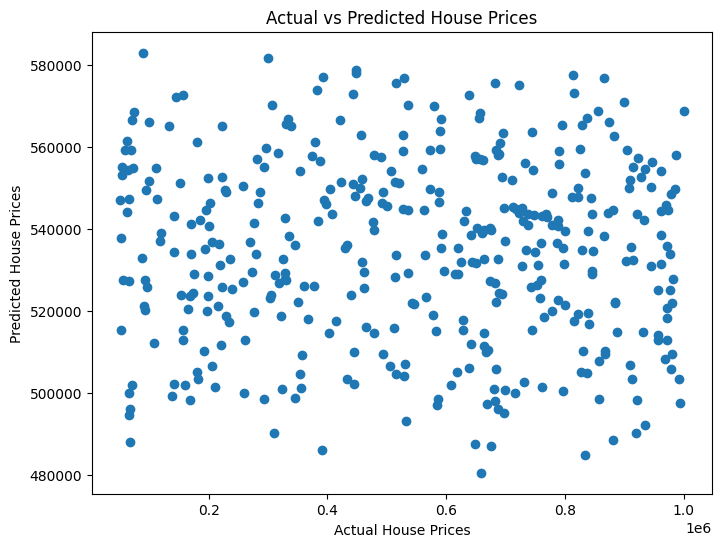

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [32]:
coefficients = pd.DataFrame({
    "Feature": X_train_numeric.columns,   # only numeric columns used in training
    "Coefficient": model.coef_
})

coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
coefficients


,Feature,Coefficient
4,Floors,18853.825572
5,YearBuilt,4004.909837
2,Bedrooms,3.953792
1,Area,-343.164250
0,Id,-7050.613163
3,Bathrooms,-11233.191214


### Conclusion
The Linear Regression model was able to learn relationships between house features and prices.
Features such as area, number of bedrooms, and availability of facilities had significant impact
on house prices. The evaluation metrics MAE and RMSE indicate reasonable prediction performance.
This model serves as a strong baseline for house price prediction.
